In [1]:
from pymodulon.io import *
from pymodulon.plotting import *
import os
from os import path

In [2]:
data_dir = path.join('..','data','5g_processed_data')
interim_dir = path.join('..','data','5g_interim')
ex_dir = path.join('..','data','external')

In [3]:
ica_data = load_json_model(path.join(data_dir,'5g_raw.json.gz'))

In [4]:
DF_enrichments = pd.read_csv(path.join(data_dir,'5G_functional_enrichments.csv'),index_col=0)
egg_df = pd.read_csv(path.join(ex_dir,'5G_eggnog_annotations_bact.tsv'),sep='\t',skiprows=5,header=None)
eggnog_cols = ['query_name','seed_ortholog','evalue','seed_ortholog_score',
               'eggNOG OGs', 'max_annot_lvl','COG_category','desc','preferred_name',
               'GOs','EC','KEGG_ko','KEGG_pathway','KEGG_module','KEGG_reaction',
               'KEGG_rclass','BRITE','KEGG_TC','CAZy','BiGG_Reaction','pFAMs']

egg_df.columns = eggnog_cols
egg_df = egg_df.iloc[:-3]
egg_df


query_name        seed_ortholog         evalue  seed_ortholog_score  \
0     EQU24_RS00005    697282.Mettu_1952  7.450000e-270                744.0   
1     EQU24_RS00010    697282.Mettu_1953  6.800000e-188                530.0   
2     EQU24_RS00015    697282.Mettu_1954  1.720000e-151                437.0   
3     EQU24_RS00020    697282.Mettu_1955   0.000000e+00               1372.0   
4     EQU24_RS00025  555779.Dthio_PD2211   2.320000e-39                131.0   
...             ...                  ...            ...                  ...   
3620  EQU24_RS22135    697282.Mettu_1949  4.040000e-228                639.0   
3621  EQU24_RS22140    857087.Metme_4144  1.330000e-275                769.0   
3622  EQU24_RS22145    857087.Metme_4143   5.420000e-36                122.0   
3623  EQU24_RS22150    686340.Metal_0002   3.880000e-49                159.0   
3624  EQU24_RS22155    686340.Metal_0003   1.090000e-18                 77.0   

                                             eggNOG OGs max_annot_lvl  \
0     COG0593@1|root,COG0593@2|Bacteria,1MU5H@1224|P...    2|Bacteria   
1     COG0592@1|root,COG0592@2|Bacteria,1MVD9@1224|P...    2|Bacteria   
2     COG1195@1|root,COG1195@2|Bacteria,1MX8N@1224|P...    2|Bacteria   
3     COG0187@1|root,COG0187@2|Bacteria,1MVKT@1224|P...    2|Bacteria   
4     2E3J3@1|root,32YHH@2|Bacteria,1NBJI@1224|Prote...    2|Bacteria   
...                                                 ...           ...   
3620  COG0486@1|root,COG0486@2|Bacteria,1MUCQ@1224|P...    2|Bacteria   
3621  COG0706@1|root,COG0706@2|Bacteria,1MV5M@1224|P...    2|Bacteria   
3622  COG0759@1|root,COG0759@2|Bacteria,1N6U4@1224|P...    2|Bacteria   
3623  COG0594@1|root,COG0594@2|Bacteria,1MZQE@1224|P...    2|Bacteria   
3624  COG0230@1|root,COG0230@2|Bacteria,1NGGS@1224|P...    2|Bacteria   

     COG_category                                               desc  \
0               L  it binds specifically double-stranded DNA at a...   
1               L  Confers DNA tethering and processivity to DNA ...   
2               L  it is required for DNA replication and normal ...   
3               L  A type II topoisomerase that negatively superc...   
4               -                                                  -   
...           ...                                                ...   
3620            J  Exhibits a very high intrinsic GTPase hydrolys...   
3621            U  Required for the insertion and or proper foldi...   
3622            S  Could be involved in insertion of integral mem...   
3623            J  RNaseP catalyzes the removal of the 5'-leader ...   
3624            J  Belongs to the bacterial ribosomal protein bL3...   

     preferred_name                                                GOs  ...  \
0              dnaA  GO:0000166,GO:0003674,GO:0003676,GO:0003677,GO...  ...   
1              dnaN  GO:0003674,GO:0003824,GO:0003887,GO:0005488,GO...  ...   
2              recF  GO:0000731,GO:0003674,GO:0003676,GO:0003677,GO...  ...   
3              gyrB  GO:0000166,GO:0003674,GO:0003676,GO:0003677,GO...  ...   
4                 -                                                  -  ...   
...             ...                                                ...  ...   
3620           mnmE  GO:0000166,GO:0001510,GO:0001882,GO:0001883,GO...  ...   
3621           yidC  GO:0002790,GO:0003674,GO:0005215,GO:0005575,GO...  ...   
3622           yidD  GO:0003674,GO:0005215,GO:0005575,GO:0005623,GO...  ...   
3623           rnpA  GO:0000966,GO:0001682,GO:0003674,GO:0003676,GO...  ...   
3624           rpmH  GO:0003674,GO:0003735,GO:0005198,GO:0005575,GO...  ...   

                  KEGG_ko                                       KEGG_pathway  \
0               ko:K02313                  ko02020,ko04112,map02020,map04112   
1               ko:K02338  ko00230,ko00240,ko01100,ko03030,ko03430,ko0344...   
2               ko:K03629                                   ko03440,map03440   
3               ko:K02470            

# Add iModulon category

In [5]:
for i,row in ica_data.imodulon_table.iterrows():
    # if pd.notnull(row.regulator):
    #     ica_data.imodulon_table.loc[i, 'category'] = 'regulatory'
    if pd.notnull(row.single_gene):
        ica_data.imodulon_table.loc[i, 'category'] = 'single_gene'
    else:
        ica_data.imodulon_table.loc[i, 'category'] = 'uncharacterized'

In [6]:
ica_data.imodulon_table.head(15)

single_gene  imodulon_size  explained_variance         category
0            NaN            111            0.010961  uncharacterized
1            NaN             23            0.006986  uncharacterized
2            NaN             44            0.020010  uncharacterized
SG_1        True              1            0.003638      single_gene
4            NaN              3            0.004384  uncharacterized
5            NaN             62            0.040222  uncharacterized
6            NaN             20            0.011649  uncharacterized
7            NaN              5            0.004450  uncharacterized
8            NaN              6            0.021518  uncharacterized
9            NaN             16            0.009330  uncharacterized
10           NaN             85            0.028817  uncharacterized
11           NaN             21            0.007132  uncharacterized
SG_2        True              1            0.006521      single_gene
13           NaN             10            0.004934  uncharacterized
14           NaN             50            0.044466  uncharacterized

## Load Vrishab's cluster data

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import altair as alt

In [8]:
cluster_df = pd.read_pickle(path.join(data_dir,'df_all_merged_kmeans_data.p'))
cluster_df.head()

locus_tag  cluster_id  LanzaTech      MeOH  NO3_lowO2_slow_growth  \
0  EQU24_RS00005          12  -0.515808 -0.012058              -0.480048   
1  EQU24_RS00010           4   0.480568 -0.659004              -0.218643   
2  EQU24_RS00015          17  -1.072637  0.327816              -0.461533   
3  EQU24_RS00020           4   0.723618 -1.032390               0.072132   
4  EQU24_RS00025           4   0.424262 -0.479325               0.028098   

       NoCu  NoLanthanum  WT_control  WithLanthanum    aa3_KO  ...   unknown  \
0 -0.163349    -0.648447   -0.037469      -0.491013 -0.410117  ... -0.620522   
1  0.075821    -0.485571   -0.114821      -0.462526  0.094641  ... -0.798028   
2 -0.212764    -0.583017   -0.648530      -0.633792 -0.917224  ... -0.753895   
3 -0.253222    -0.352283    0.183488      -0.292974  0.144541  ... -0.532597   
4  0.116538    -0.261659    0.082847      -0.454102 -0.051229  ... -0.011128   

   gene                                         product  start_coord  \
0  dnaA  chromosomal replication initiator protein DnaA            0   
1                       DNA polymerase III subunit beta         1502   
2  recF             DNA replication/repair protein RecF         3060   
3  gyrB   DNA topoisomerase (ATP-hydrolyzing) subunit B         4185   
4                                  hypothetical protein         6825   

   end_coord  length                                        translation  \
0       1317    1318  MSALWNNCLAKLENEISSSEFSTWIRPLQAIETDGQIKLLAPNRFV...   
1       2603    1102  MKYIINREQLLVPLQQIVSVIEKRQTMPILSNVLMVFRENTLVMTG...   
2       4140    1081  MSLQKLDIFNVRNIRQASLQPSPGLNLIYGANASGKSSVLEAIFIL...   
3       6600    2416  MSENIKQYDSTNIQVLKGLDAVRKRPGMYIGDTDDGTGLHHMVFEV...   
4       7062     238  VKTTKYFLTTRMRPDREIIKDEWIQYVVRFPENEHIQFDGRIRRWA...   

   group                                           go_terms  \
0   else  [GO:0003688, GO:0005524, GO:0005737, GO:000627...   
1   else  [GO:0003677, GO:0003887, GO:0005737, GO:000626...   
2   else  [GO:0003697, GO:0005524, GO:0005737, GO:000626...   
3   else  [GO:0003677, GO:0003918, GO:0005524, GO:000569...   
4   else                                                 []   

                                         desc_string  
0  EQU24_RS00005|dnaA|chromosomal replication ini...  
1     EQU24_RS00010||DNA polymerase III subunit beta  
2  EQU24_RS00015|recF|DNA replication/repair prot...  
3  EQU24_RS00020|gyrB|DNA topoisomerase (ATP-hydr...  
4                EQU24_RS00025||hypothetical protein  

[5 rows x 31 columns]

In [9]:
len(cluster_df['cluster_id'].unique())

19

In [10]:
cluster_df.shape

(4213, 31)

In [11]:
b = ica_data.M_binarized

In [12]:
gene_imod_count = []
for i, row in b.iterrows():
    c = sum(row.values)
    gene_imod_count.append((i,c))

gene_imod_dict = dict(gene_imod_count)

In [13]:
gene_imod_dict['EQU24_RS00020']

1.0

In [14]:
cluster_df['imod_count'] = cluster_df['locus_tag'].apply(lambda x: gene_imod_dict[x])

In [15]:
alt.Chart(cluster_df).mark_circle(size=60).encode(
    x='start_coord:Q',
    y='imod_count:Q',
    color='cluster_id:N',
    tooltip=['locus_tag:N', 'gene:N', 'product:N', 'cluster_id:N']
).interactive()

alt.Chart(...)

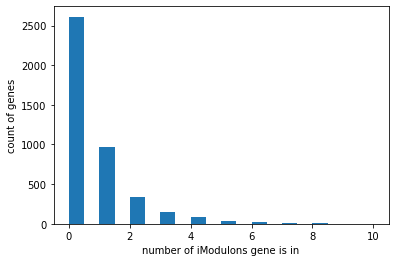

In [16]:
plt.hist(cluster_df['imod_count'].values, bins=20)
plt.xlabel("number of iModulons gene is in")
plt.ylabel("count of genes")
plt.show()

In [17]:
ica_data.view_imodulon(21)

gene_weight                                    product type  \
EQU24_RS00940     0.172611                       hypothetical protein  CDS   
EQU24_RS07675     0.159194               conjugation transfer protein  CDS   
EQU24_RS07680     0.172562                       hypothetical protein  CDS   
EQU24_RS19470     0.156530                 S8 family serine peptidase  CDS   
EQU24_RS19475     0.176029                       hypothetical protein  CDS   
EQU24_RS19480     0.190035                     DUF3438 family protein  CDS   
EQU24_RS19485     0.207103                       hypothetical protein  CDS   
EQU24_RS19490     0.200073  type II secretion system F family protein  CDS   
EQU24_RS19495     0.206576                       hypothetical protein  CDS   
EQU24_RS19500     0.229408                       hypothetical protein  CDS   
EQU24_RS19505     0.229517                       hypothetical protein  CDS   
EQU24_RS19510     0.247681          DUF2939 domain-containing protein  CDS   
EQU24_RS19515     0.254676                       hypothetical protein  CDS   
EQU24_RS19520     0.347010           type II secretion system protein  CDS   
EQU24_RS21000     0.153899                       hypothetical protein  CDS   

              gene_symbol          locus  start_coord  end_coord  \
EQU24_RS00940         NaN  NZ_CP035467.1       193739     193970   
EQU24_RS07675         NaN  NZ_CP035467.1      1687716    1689852   
EQU24_RS07680         NaN  NZ_CP035467.1      1690300    1691008   
EQU24_RS19470         NaN  NZ_CP035467.1      4363642    4366327   
EQU24_RS19475         NaN  NZ_CP035467.1      4366809    4368060   
EQU24_RS19480         NaN  NZ_CP035467.1      4368064    4370446   
EQU24_RS19485         NaN  NZ_CP035467.1      4371273    4371714   
EQU24_RS19490         NaN  NZ_CP035467.1      4371734    4372952   
EQU24_RS19495         NaN  NZ_CP035467.1      4373252    4375061   
EQU24_RS19500         NaN  NZ_CP035467.1      4376070    4376724   
EQU24_RS19505         NaN  NZ_CP035467.1      4376720    4378118   
EQU24_RS19510         NaN  NZ_CP035467.1      4378491    4379061   
EQU24_RS19515         NaN  NZ_CP035467.1      4379234    4379630   
EQU24_RS19520         NaN  NZ_CP035467.1      4381327    4382239   
EQU24_RS21000         NaN  NZ_CP035467.1      4728787    4731319   

                                                            note  \
EQU24_RS00940  Derived by automated computational analysis us...   
EQU24_RS07675  Derived by automated computational analysis us...   
EQU24_RS07680  Derived by automated computational analysis us...   
EQU24_RS19470  Derived by automated computational analysis us...   
EQU24_RS19475  Derived by automated computational analysis us...   
EQU24_RS19480  Derived by automated computational analysis us...   
EQU24_RS19485  Derived by automated computational analysis us...   
EQU24_RS19490  Derived by automated computational analysis us...   
EQU24_RS19495  Derived by automated computational analysis us...   
EQU24_RS19500  Derived by automated computational analysis us...   
EQU24_RS19505  Derived by automated computational analysis us...   
EQU24_RS19510  Derived by automated computational analysis us...   
EQU24_RS19515  Derived by automated computational analysis us...   
EQU24_RS19520  Derived by automated computational analysis us...   
EQU24_RS21000  Derived by automated computational analysis us...   

                                                     translation  gene_len  \
EQU24_RS00940  MSQDLARVENEVNFDNNGALLVGAGLAVASMIVLPALAMRLGLGAS...       232   
EQU24_RS07675  MFISVKKTSVRQFALSLACLLTVCVAHPKWALAHGFAEDHSFGLVT...      2137   
EQU24_RS07680  MKKTSKLKALTFAAAAMGALVSLPSNAATVITPDVHLFEFTPDNSS...       709   
EQU24_RS19470  MLMMNRYRLVFLLMVCCGVSAQGADIRLSSHLQRLQAEFRQHSAAG...      2686   
EQU24_RS19475  MHKITSRNSQLCGGSVTRLTGRRDYILVGLTASVPAADTSQASHRT...      1252   
EQU24_RS19480  MLRIFRFCVLLAGLWAGLCFHTSAHALRSPEQKIAQLDFRDISVGD...      2383   
EQU24_RS19485  MLAAICGSATGEVAGEDRAPQADVVRS

In [18]:
ica_data.M.sort_values(21)[[2,21,27]]

2        21        27
EQU24_RS01670 -0.046107 -0.044213  0.023829
EQU24_RS20510  0.026612 -0.040539  0.030992
EQU24_RS08540  0.008778 -0.033911  0.002950
EQU24_RS09190  0.015173 -0.033907  0.041859
EQU24_RS08545  0.008108 -0.032222  0.003405
...                 ...       ...       ...
EQU24_RS19500  0.013907  0.229408 -0.010453
EQU24_RS19505  0.007427  0.229517  0.005320
EQU24_RS19510 -0.006112  0.247681  0.001529
EQU24_RS19515 -0.018497  0.254676 -0.002260
EQU24_RS19520 -0.012556  0.347010  0.012680

[4213 rows x 3 columns]

In [19]:
def view_imod_weights_on_genome(ica_data, imod_id):
    genes_in_imod = set(ica_data.view_imodulon(imod_id).index)
    gene2weight = dict(ica_data.M[imod_id].reset_index().values)
    temp_df = ica_data.gene_table[['gene_symbol','product','start_coord']].fillna('')
    temp_df.index.name='locus_tag'
    temp_df = temp_df.reset_index()
    temp_df['weight'] = temp_df['locus_tag'].apply(lambda x: gene2weight[x])
    temp_df['in_imod?'] = temp_df['locus_tag'].apply(lambda x: x in genes_in_imod)
    
    

    chart = alt.Chart(temp_df).mark_circle(size=60).encode(
        x=alt.X('start_coord:Q',axis=alt.Axis(title='Genomic Coordinate')),
        y=alt.Y('weight:Q',axis=alt.Axis(title=f'M weight for iModulon {imod_id}')),
        color='in_imod?:N',
        tooltip=['locus_tag:N', 'gene_symbol:N', 'product:N','in_imod?:N']
    ).interactive()
    return chart

In [99]:
view_imod_weights_on_genome(ica_data,15)

alt.Chart(...)

In [21]:
cluster_df[cluster_df['locus_tag']=='EQU24_RS18140']

locus_tag  cluster_id  LanzaTech      MeOH  NO3_lowO2_slow_growth  \
3444  EQU24_RS18140          13   1.649822 -1.715231               1.630897   

          NoCu  NoLanthanum  WT_control  WithLanthanum    aa3_KO  ...  gene  \
3444  0.716357     0.823257    2.018022      -0.418066  1.821672  ...         

                                                product  start_coord  \
3444  PQQ-dependent dehydrogenase, methanol/ethanol ...      4043061   

      end_coord  length                                        translation  \
3444    4044870    1810  MQHHKKRELWGAAALVSGVLLAASQPAQANQALDKLSKQNTNWVMQ...   

      group                                           go_terms  \
3444    mxa  [GO:0005509, GO:0016020, GO:0030288, GO:005293...   

                                            desc_string  imod_count  
3444  EQU24_RS18140||PQQ-dependent dehydrogenase, me...         2.0  

[1 rows x 32 columns]

In [22]:
def view_imod_weights_dist(ica_data):
    top5_weights = []
    no_weights = []
    for i, row in ica_data.M.iterrows():
        weights = [np.abs(x) for x in row]
        weights = sorted(weights,reverse=True)
        if weights[0] <0.01:
            print(i, weights[:5])
        if weights[0] == 0.0:
            print(weights[:5])
            no_weights.append(i)
        else:
            top5_weights.append(weights[:5])

    cols = ['1st largest weight','2nd largest weight','3rd largest weight','4th largest weight','5th largest weight']
    top5_df = pd.DataFrame(top5_weights,columns=cols)
    
    for c in cols[:4]:
        plt.hist(top5_df[c].values, bins=20,label=c,alpha=0.2)
    plt.yscale('log')
    plt.legend()
    plt.xlabel("M weight")
    plt.ylabel("number of genes")
    plt.show()

    return no_weights

EQU24_RS06835 [0.0093224478985308, 0.0087402908396045, 0.0086771336579574, 0.0085897739072896, 0.0084894267920135]
EQU24_RS12280 [0.009858027197828, 0.0098192492574554, 0.0095236449909005, 0.0088910031495051, 0.0078586147440651]
EQU24_RS18195 [0.0093836848978608, 0.0090466062091369, 0.0084950820865008, 0.0083271375021847, 0.0076611049350027]
EQU24_RS18685 [0.0079286096730364, 0.007151206359788, 0.0063164350319517, 0.0060604556676221, 0.0057227444621298]
EQU24_RS21420 [0.0095155176475783, 0.008650190994371, 0.0081842825556553, 0.0077135831362141, 0.0075980948554141]
EQU24_RS21660 [0.0099873726695006, 0.0097799835700841, 0.0097240535638001, 0.0091474493106621, 0.0082928557519566]


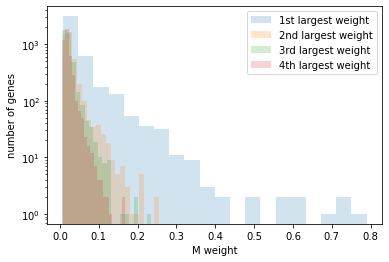

In [23]:
no_weights = view_imod_weights_dist(ica_data)

<AxesSubplot:xlabel='Gene Start', ylabel='21 Gene Weight'>

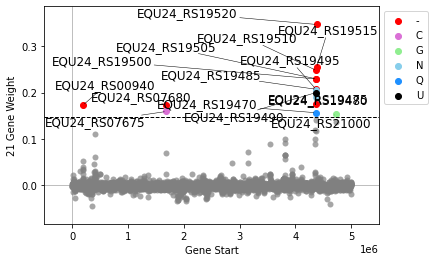

In [24]:
ica_data.gene_table['start'] = ica_data.gene_table['start_coord']
plot_gene_weights(ica_data,21)

## Actually analyze some clusters?

In [25]:
from collections import defaultdict

In [26]:
# make cluster id to gene set
c2g_map = cluster_df[['cluster_id','locus_tag']].values
c2g = defaultdict(set)
for cid,lt in c2g_map:
    c2g[cid].add(lt)


Text(0, 0.5, 'Number of genes')

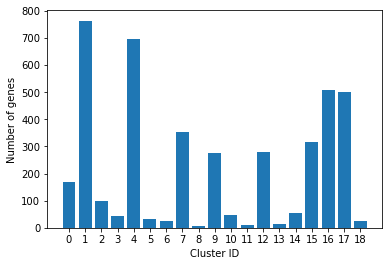

In [27]:
plt.xticks(range(len(c2g.keys())))
plt.bar(c2g.keys(), [len(c2g[x]) for x in c2g])
plt.xlabel("Cluster ID")
plt.ylabel("Number of genes")

In [28]:
im2g = {}
for i in ica_data.imodulon_names:
    im_genes = set(ica_data.view_imodulon(i).index.values)
    im2g[i]=im_genes

In [29]:
# genes with no iModulon
im2g[-1] = set([x for x in gene_imod_dict if gene_imod_dict[x]==0.0])

In [30]:
im2g[21]

{'EQU24_RS00940',
 'EQU24_RS07675',
 'EQU24_RS07680',
 'EQU24_RS19470',
 'EQU24_RS19475',
 'EQU24_RS19480',
 'EQU24_RS19485',
 'EQU24_RS19490',
 'EQU24_RS19495',
 'EQU24_RS19500',
 'EQU24_RS19505',
 'EQU24_RS19510',
 'EQU24_RS19515',
 'EQU24_RS19520',
 'EQU24_RS21000'}

Text(0, 0.5, 'number of genes')

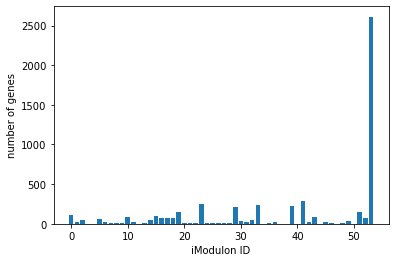

In [31]:
plt.bar(range(len(im2g.keys())), [len(im2g[x]) for x in im2g])
plt.xlabel("iModulon ID")
plt.ylabel("number of genes")

In [32]:
# calculate the overlap similarity 
def overlap_sim(s1, s2):
    n = len(s1.intersection(s2))
    d = min(len(s1),len(s2))
    if d == 0:
        return 0
    return n/d

def jacc_sim(s1,s2):
    n = len(s1.intersection(s2))
    d = len(s1 | s2)
    if d == 0:
        return 0 
    return n/d

def get_sim(map1, map2,map1_name, map2_name):
    data = []
    for s1 in map1:
        for s2 in map2:
            o = overlap_sim(map1[s1], map2[s2])
            j = jacc_sim(map1[s1], map2[s2])
            data.append((s1,s2,o,j))

    return pd.DataFrame(data, columns=[map1_name,map2_name,'osim','jsim'])



In [33]:
sims = get_sim(c2g, im2g,'cluster','imodulon')

In [34]:
alt.Chart(sims).mark_rect().encode(
    x='imodulon:O',
    y='cluster:O',
    color='osim:Q'
)

alt.Chart(...)

In [35]:
alt.Chart(sims).mark_rect().encode(
    x='imodulon:O',
    y='cluster:O',
    color='jsim:Q'
)

alt.Chart(...)

In [36]:
from goatools import obo_parser
go_file = os.path.join('..','data','external','GO_20220505.txt')
p = obo_parser.GODag(go_file)

../data/external/GO_20220505.txt: fmt(1.2) rel(2022-03-22) 47,103 Terms


In [37]:
def quick_go_view(go_list):
    for g in go_list:
        try:
            print(p[g].name)
        except:
            print(f"--> {g} not in GO dag?")

In [38]:
# summary report of imodulon adn cluster comparison
imod = 36
cluster_id = 6

r = sims[(sims['cluster']==cluster_id) & (sims['imodulon']==imod)].dropna()
print(r)

# enrichments
ecols = ['imodulon','imodulon_size','source','annotation','go_name','pathway_name','module_name']
DF_enrichments[DF_enrichments['imodulon']==imod][ecols].fillna("")


     cluster imodulon      osim      jsim
792        6       36  0.833333  0.666667


imodulon  imodulon_size         source annotation go_name  \
33        36           26.0  KEGG pathways   map02030           
34        36           26.0  KEGG pathways   map02020           
40        36           26.0   KEGG modules     M00506           

            pathway_name module_name  
33  Bacterial chemotaxis              
34  Two-component system              
40

In [39]:
cl_go_col = cluster_df[cluster_df['cluster_id']==cluster_id]['go_terms'].values
cluster_gos = [item for sublist in cl_go_col for item in sublist]
print(f"___cluster GOs___ cluster {cluster_id}")
quick_go_view(cluster_gos)

___cluster GOs___ cluster 6
serine-type endopeptidase activity
proteolysis
chemotaxis
signal transduction
transmembrane signaling receptor activity
chemotaxis
signal transduction
integral component of membrane
phosphorelay sensor kinase activity
phosphorelay signal transduction system
ATP binding
cytoplasm
chemotaxis
membrane
peptidyl-histidine phosphorylation
signal transduction
phosphorelay signal transduction system
DNA binding
transmembrane signaling receptor activity
chemotaxis
signal transduction
integral component of membrane
phosphorelay signal transduction system
protein binding
phosphorelay sensor kinase activity
phosphorelay signal transduction system
nucleotide binding
signal transduction
ion binding
protein methylation
protein-glutamate O-methyltransferase activity
transmembrane signaling receptor activity
chemotaxis
signal transduction
integral component of membrane
phosphorelay signal transduction system
kinase activity
phosphorylation
molecular_function
cellular_compone

In [40]:
egg_go_col = egg_df[egg_df['query_name'].isin(im2g[imod])]["GOs"].values
egg_go_col = [x for x in egg_go_col if x!='-']
egg_go_col = [x.split(',') for x in egg_go_col]
egg_gos = [item for sublist in egg_go_col for item in sublist]
print(f"___Egg GOs - iMod {imod}___")
quick_go_view(egg_gos)

___Egg GOs - iMod 36___
cellular_component
intracellular anatomical structure
--> GO:0005623 not in GO dag?
cytoplasm
--> GO:0044424 not in GO dag?
--> GO:0044464 not in GO dag?
chemotaxis
biological_process
response to external stimulus
locomotion
response to chemical
taxis
response to stimulus
molecular_function
catalytic activity
chemotaxis
biological_process
protein-glutamate methylesterase activity
response to external stimulus
hydrolase activity
hydrolase activity, acting on ester bonds
locomotion
response to chemical
taxis
response to stimulus
protein methylesterase activity
carboxylic ester hydrolase activity
catalytic activity, acting on a protein


In [41]:
view_imod_weights_on_genome(ica_data,imod)

alt.Chart(...)

In [42]:
ica_data.view_imodulon(imod)

gene_weight                                            product  \
locus_tag                                                                       
EQU24_RS10515     0.134049                               hypothetical protein   
EQU24_RS10520     0.157371                            chemotaxis protein CheW   
EQU24_RS10525     0.139085                methyl-accepting chemotaxis protein   
EQU24_RS10530     0.193176                            chemotaxis protein CheA   
EQU24_RS10535     0.199150                     STAS domain-containing protein   
EQU24_RS10540     0.176073                                 response regulator   
EQU24_RS10545     0.173408                               hypothetical protein   
EQU24_RS10550     0.139188                           PAS domain S-box protein   
EQU24_RS10565     0.092290                                 response regulator   
EQU24_RS10575     0.096598  chemotaxis response regulator protein-glutamat...   
EQU24_RS10580     0.121634         protein-glutamate O-methyltransferase CheR   
EQU24_RS10605     0.101795                       anti-sigma regulatory factor   
EQU24_RS10610     0.094357                     STAS domain-containing protein   
EQU24_RS10615     0.094995                     STAS domain-containing protein   
EQU24_RS10620     0.105663                               hypothetical protein   
EQU24_RS10625     0.107209                                 response regulator   
EQU24_RS10630     0.127642                               hypothetical protein   
EQU24_RS10635     0.110909                            chemotaxis protein CheA   
EQU24_RS10640     0.121851                                 response regulator   
EQU24_RS10645     0.133420         protein-glutamate O-methyltransferase CheR   
EQU24_RS10650     0.135621              HEAT repeat domain-containing protein   
EQU24_RS10655     0.160257  chemotaxis-specific protein-glutamate methyltr...   
EQU24_RS10660     0.177824                            chemotaxis protein CheW   
EQU24_RS10665     0.193471                                 chemotaxis protein   
EQU24_RS12805    -0.143534                             IS4 family transposase   
EQU24_RS16040    -0.093340                           ISNCY family transposase   

              type gene_symbol          locus  start_coord  end_coord  \
locus_tag                                                               
EQU24_RS10515  CDS         NaN  NZ_CP035467.1      2336585    2336855   
EQU24_RS10520  CDS         NaN  NZ_CP035467.1      2336917    2337478   
EQU24_RS10525  CDS         NaN  NZ_CP035467.1      2337487    2340502   
EQU24_RS10530  CDS         NaN  NZ_CP035467.1      2340582    2342751   
EQU24_RS10535  CDS         NaN  NZ_CP035467.1      2342747    2343071   
EQU24_RS10540  CDS         NaN  NZ_CP035467.1      2343082    2343451   
EQU24_RS10545  CDS         NaN  NZ_CP035467.1      2343463    2344675   
EQU24_RS10550  CDS         NaN  NZ_CP035467.1      2345682    2347200   
EQU24_RS10565  CDS         NaN  NZ_CP035467.1      2351540    2352749   
EQU24_RS10575  CDS         NaN  NZ_CP035467.1      2355155    2356262   
EQU24_RS10580  CDS         NaN  NZ_CP035467.1      2356465    2357308   
EQU24_RS10605  CDS         NaN  NZ_CP035467.1      2359954    2360374   
EQU24_RS10610  CDS         NaN  NZ_CP035467.1      2360377    2360764   
EQU24_RS10615  CDS         NaN  NZ_CP035467.1      2360760    2361636   
EQU24_RS10620  CDS         NaN  NZ_CP035467.1      2361767    2362991   
EQU24_RS10625  CDS         NaN  NZ_CP035467.1      2363007    2363382   
EQU24_RS10630  CDS         NaN  NZ_CP035467.1      2363383    2363632   
EQU24_RS10635  CDS         NaN  NZ_CP035467.1      2363631    2366004   
EQU24_RS10640  CDS         NaN  NZ_CP035467.1      2366000    2366372   
EQU24_RS10645  CDS         NaN  NZ_CP035467.1      2366368    2367211   
EQU24_RS10650  CDS         NaN  NZ_CP035467.1      2367223    2367859   
EQU24_RS10655  CDS        cheB  NZ_CP035467.1      2368179    23692

## How often to EggNog and Blast2Go disagree?

In [43]:
egg_df[['query_name','GOs']]

query_name                                                GOs
0     EQU24_RS00005  GO:0000166,GO:0003674,GO:0003676,GO:0003677,GO...
1     EQU24_RS00010  GO:0003674,GO:0003824,GO:0003887,GO:0005488,GO...
2     EQU24_RS00015  GO:0000731,GO:0003674,GO:0003676,GO:0003677,GO...
3     EQU24_RS00020  GO:0000166,GO:0003674,GO:0003676,GO:0003677,GO...
4     EQU24_RS00025                                                  -
...             ...                                                ...
3620  EQU24_RS22135  GO:0000166,GO:0001510,GO:0001882,GO:0001883,GO...
3621  EQU24_RS22140  GO:0002790,GO:0003674,GO:0005215,GO:0005575,GO...
3622  EQU24_RS22145  GO:0003674,GO:0005215,GO:0005575,GO:0005623,GO...
3623  EQU24_RS22150  GO:0000966,GO:0001682,GO:0003674,GO:0003676,GO...
3624  EQU24_RS22155  GO:0003674,GO:0003735,GO:0005198,GO:0005575,GO...

[3625 rows x 2 columns]

In [44]:
cluster_df[['locus_tag','go_terms']]

locus_tag                                           go_terms
0     EQU24_RS00005  [GO:0003688, GO:0005524, GO:0005737, GO:000627...
1     EQU24_RS00010  [GO:0003677, GO:0003887, GO:0005737, GO:000626...
2     EQU24_RS00015  [GO:0003697, GO:0005524, GO:0005737, GO:000626...
3     EQU24_RS00020  [GO:0003677, GO:0003918, GO:0005524, GO:000569...
4     EQU24_RS00025                                                 []
...             ...                                                ...
4208  EQU24_RS22135  [GO:0003924, GO:0005515, GO:0005525, GO:000573...
4209  EQU24_RS22140  [GO:0005886, GO:0015031, GO:0016021, GO:003297...
4210  EQU24_RS22145                                       [GO:0005886]
4211  EQU24_RS22150   [GO:0000049, GO:0001682, GO:0004526, GO:0090502]
4212  EQU24_RS22155               [GO:0003735, GO:0005840, GO:0006412]

[4213 rows x 2 columns]

In [45]:
egg_go_map = dict([(x,set(y.split(','))) for x,y in egg_df[['query_name','GOs']].values])
eggsclude = [x for x in egg_go_map if egg_go_map[x] =={'-'}]
for e in eggsclude:
    egg_go_map.pop(e)
egg_go_map['EQU24_RS19310']

{'GO:0003674',
 'GO:0003824',
 'GO:0004497',
 'GO:0005575',
 'GO:0008150',
 'GO:0008152',
 'GO:0009987',
 'GO:0015049',
 'GO:0015050',
 'GO:0015947',
 'GO:0016491',
 'GO:0016705',
 'GO:0016709',
 'GO:0032991',
 'GO:0043446',
 'GO:0044237',
 'GO:0055114',
 'GO:0071704',
 'GO:1902494'}

In [46]:
b2g_map = dict([(x,set(y)) for x,y in cluster_df[['locus_tag','go_terms']].values])
exclude = [x for x in b2g_map if len(b2g_map[x]) ==0]
for e in exclude:
    b2g_map.pop(e)
b2g_map['EQU24_RS19310']

{'GO:0015049', 'GO:0016021', 'GO:0055114'}

In [47]:
print(len(b2g_map.keys()))
print(len(egg_go_map.keys()))

3255
1193


In [61]:
# Get the GO dominance?
def get_go_dominance(
    gene_info, map1, map2,
    locus_col='locus_tag',
    gene_col='gene',
    product_col='product'):

    go_dom = []
    for _,row in gene_info.iterrows():
        lt = row[locus_col]
        g = row[gene_col]
        p = row[product_col]

        # check if the locus has no go terms in map 1
        if lt not in map1:
            m1_gos = set()
        else:
            m1_gos = map1[lt]
        
        # check if the locus has no go terms in map 1
        if lt not in map2:
            m2_gos = set()
        else:
            m2_gos = map2[lt]

        if len(m1_gos) + len(m2_gos) == 0:
            empty = True
        else:
            empty = False

        m1_extras = len(m1_gos - m2_gos)
        m2_extras = len(m2_gos - m1_gos)
        diff = m1_extras - m2_extras
        inter = len(m1_gos.intersection(m2_gos))

        data_row = [lt, g, p, m1_extras, m2_extras, diff, inter,empty]
        go_dom.append(data_row)

    # make pandas DF
    go_dom_df = pd.DataFrame(go_dom, columns=['locus_tag','gene','product','m1_extras','m2_extras','go_diff','go_inter','empty'])

    return go_dom_df


In [62]:
go_dom_df = get_go_dominance(cluster_df, b2g_map, egg_go_map)

In [63]:
go_dom_df.head()

locus_tag  gene                                         product  \
0  EQU24_RS00005  dnaA  chromosomal replication initiator protein DnaA   
1  EQU24_RS00010                       DNA polymerase III subunit beta   
2  EQU24_RS00015  recF             DNA replication/repair protein RecF   
3  EQU24_RS00020  gyrB   DNA topoisomerase (ATP-hydrolyzing) subunit B   
4  EQU24_RS00025                                  hypothetical protein   

   m1_extras  m2_extras  go_diff  go_inter  empty  
0          0         71      -71         5  False  
1          3         56      -53         5  False  
2          1         59      -58         5  False  
3          3         82      -79         5  False  
4          0          0        0         0   True

In [64]:
go_dom_df['m2_flip'] = go_dom_df['m2_extras'].apply(lambda x: -x)


In [65]:
go_dom_df.head(10)

locus_tag  gene                                            product  \
0  EQU24_RS00005  dnaA     chromosomal replication initiator protein DnaA   
1  EQU24_RS00010                          DNA polymerase III subunit beta   
2  EQU24_RS00015  recF                DNA replication/repair protein RecF   
3  EQU24_RS00020  gyrB      DNA topoisomerase (ATP-hydrolyzing) subunit B   
4  EQU24_RS00025                                     hypothetical protein   
5  EQU24_RS00030                        DUF2283 domain-containing protein   
6  EQU24_RS00035                                     hypothetical protein   
7  EQU24_RS00040                                      TolC family protein   
8  EQU24_RS00045        efflux RND transporter periplasmic adaptor sub...   
9  EQU24_RS00050                  efflux RND transporter permease subunit   

   m1_extras  m2_extras  go_diff  go_inter  empty  m2_flip  
0          0         71      -71         5  False      -71  
1          3         56      -53         5  False      -56  
2          1         59      -58         5  False      -59  
3          3         82      -79         5  False      -82  
4          0          0        0         0   True        0  
5          0          0        0         0   True        0  
6          0          0        0         0   True        0  
7          2          0        2         0  False        0  
8          3          0        3         0  False        0  
9          5          0        5         0  False        0

In [67]:
go_dom_df_filt = go_dom_df[go_dom_df['empty']==False]
go_dom_df_filt.shape

(3299, 9)

In [83]:
bpoints = alt.Chart(go_dom_df_filt.reset_index()).mark_circle().encode(
    x=alt.X('m1_extras:Q',axis=alt.Axis(title=f"# extra GO terms (b2g - eggnog)")),
    y=alt.Y('index:Q',axis=alt.Axis(title=f"Locus Tag Index")),
    color=alt.Color('go_inter:Q',scale=alt.Scale(scheme='viridis'),title=f"# GO intersection"),
    tooltip=['locus_tag:N','gene:N','product:N','m1_extras:Q','m2_extras:Q','go_diff:Q','go_inter:Q']
)

epoints = alt.Chart(go_dom_df_filt.reset_index()).mark_circle().encode(
    x=alt.X('m2_flip:Q',axis=alt.Axis(title=f"# extra GO terms (b2g - eggnog)")),
    y=alt.Y('index:Q',axis=alt.Axis(title=f"Locus Tag Index")),
    color=alt.Color('go_inter:Q',scale=alt.Scale(scheme='viridis'),title=f"# GO intersection"),
    tooltip=['locus_tag:N','gene:N','product:N','m1_extras:Q','m2_extras:Q','go_diff:Q','go_inter:Q']
)

bars = alt.Chart(go_dom_df_filt.reset_index()).mark_rule().encode(
    x=alt.X('m1_extras:Q',axis=alt.Axis(title=f"# extra GO terms (b2g - eggnog)")),
    x2=alt.X2('m2_flip:Q'),
    y=alt.Y('index:Q',axis=alt.Axis(title=f"Locus Tag Index")),
    color=alt.Color('go_inter:Q',scale=alt.Scale(scheme='viridis'),title=f"# GO intersection"),
    tooltip=['locus_tag:N','gene:N','product:N','m1_extras:Q','m2_extras:Q','go_diff:Q','go_inter:Q']
).properties(
    width=300,
    height=500
)

bpoints+epoints+bars

alt.LayerChart(...)

In [78]:
print(b2g_map['EQU24_RS19315'])
print(egg_go_map['EQU24_RS19315'])

{'GO:0015049', 'GO:0055114', 'GO:0016021'}


KeyError: 'EQU24_RS19315'

In [80]:
for x in b2g_map['EQU24_RS19315']:
    try:
        print(p[x].name)
    except:
        print("missing")

methane monooxygenase activity
missing
integral component of membrane


In [81]:
cluster_df

locus_tag  cluster_id  LanzaTech      MeOH  NO3_lowO2_slow_growth  \
0     EQU24_RS00005          12  -0.515808 -0.012058              -0.480048   
1     EQU24_RS00010           4   0.480568 -0.659004              -0.218643   
2     EQU24_RS00015          17  -1.072637  0.327816              -0.461533   
3     EQU24_RS00020           4   0.723618 -1.032390               0.072132   
4     EQU24_RS00025           4   0.424262 -0.479325               0.028098   
...             ...         ...        ...       ...                    ...   
4208  EQU24_RS22135           9  -0.445389 -0.627550              -1.170665   
4209  EQU24_RS22140           9   0.309593 -1.327737              -1.065740   
4210  EQU24_RS22145           0  -1.028264 -0.395724              -1.265702   
4211  EQU24_RS22150           0  -0.670633 -0.279756              -1.404703   
4212  EQU24_RS22155           0  -0.665398 -1.464863              -1.306404   

          NoCu  NoLanthanum  WT_control  WithLanthanum    aa3_KO  ...  gene  \
0    -0.163349    -0.648447   -0.037469      -0.491013 -0.410117  ...  dnaA   
1     0.075821    -0.485571   -0.114821      -0.462526  0.094641  ...         
2    -0.212764    -0.583017   -0.648530      -0.633792 -0.917224  ...  recF   
3    -0.253222    -0.352283    0.183488      -0.292974  0.144541  ...  gyrB   
4     0.116538    -0.261659    0.082847      -0.454102 -0.051229  ...         
...        ...          ...         ...            ...       ...  ...   ...   
4208 -0.396450    -1.877416   -0.819438      -1.715711 -0.966683  ...  mnmE   
4209 -0.706776    -1.812366   -0.818297      -1.749368 -0.654022  ...  yidC   
4210 -0.657315    -2.492508   -0.803695      -2.140667 -0.926349  ...  yidD   
4211 -0.775605    -2.384838   -1.209018      -2.238072 -1.143556  ...  rnpA   
4212 -0.270004    -1.906208   -0.579939      -1.735955 -0.504679  ...  rpmH   

                                                product  start_coord  \
0        chromosomal replication initiator protein DnaA            0   
1                       DNA polymerase III subunit beta         1502   
2                   DNA replication/repair protein RecF         3060   
3         DNA topoisomerase (ATP-hydrolyzing) subunit B         4185   
4                                  hypothetical protein         6825   
...                                                 ...          ...   
4208  tRNA uridine-5-carboxymethylaminomethyl(34) sy...      4994941   
4209                    membrane protein insertase YidC      4996295   
4210  membrane protein insertion efficiency factor YidD      4997998   
4211                   ribonuclease P protein component      4998201   
4212                          50S ribosomal protein L34      4998574   

      end_coord  length                                        translation  \
0          1317    1318  MSALWNNCLAKLENEISSSEFSTWIRPLQAIETDGQIKLLAPNRFV...   
1          2603    1102  MKYIINREQLLVPLQQIVSVIEKRQTMPILSNVLMVFRENTLVMTG...   
2          4140    1081  MSLQKLDIFNVRNIRQASLQPSPGLNLIYGANASGKSSVLEAIFIL...   
3          6600    2416  MSENIKQYDSTNIQVLKGLDAVRKRPGMYIGDTDDGTGLHHMVFEV...   
4          7062     238  VKTTKYFLTTRMRPDREIIKDEWIQYVVRFPENEHIQFDGRIRRWA...   
...         ...     ...                                                ...   
4208    4996288    1348  VDIGTNDTIAAIATPPGNGGVGIVRISGPAVSIIAAKLTDRPLPPR...   
4209    4997993    1699  MDNIRFILVVTFAMLLYMLYDAWQIDYGPKREISVAQQMPQDLKED...   
4210    4998220     223  MRVLLIAIIKLYQYFISPLLGKNCRFYPSCSCYALEALHKHGAAQG...   
4211    4998570     370  LTNKVFSFPPQLRLRKPSEYKKVFTGPVKSSDAYFTLLAVRNELDH...   
4212    4998709     136      MKRTYQPSKIKRVRTHGFRARMATKGGRKVLNARRAKGRAKLTV*   

      group                                           go_terms  \
0      else  [GO:0003688, GO:0005524, GO:0005737, GO:000627...   
1      else  [GO:0003677, GO:0003887, GO:0005737, GO:000626...   
2      else  [GO:0003697, GO:0005524, GO:0005737, GO:000626...   
3      else  [GO:0003677, GO:0003918, GO:00055

In [88]:
# Combine GO maps

def combine_go_maps(gene_info,map1, map2,
    locus_col='locus_tag',
    gene_col='gene',
    product_col='product'):

    data = []
    for _,row in gene_info.iterrows():
        lt = row[locus_col]
        g = row[gene_col]
        p = row[product_col]

        # check if the locus has no go terms in map 1
        if lt not in map1:
            m1_gos = set()
        else:
            m1_gos = map1[lt]
        
        # check if the locus has no go terms in map 1
        if lt not in map2:
            m2_gos = set()
        else:
            m2_gos = map2[lt]

        if len(m1_gos) + len(m2_gos) == 0:
            empty = True
        else:
            empty = False

        go_comb = m1_gos | m2_gos # set union

        data_row = [lt, g, p, list(go_comb)]
        data.append(data_row)

    # make pandas DF
    go_df = pd.DataFrame(data, columns=['locus_tag','gene','product','go_terms'])

    return go_df

In [89]:
go_comb_df = combine_go_maps(cluster_df, b2g_map, egg_go_map)
go_comb_df.head()

locus_tag  gene                                         product  \
0  EQU24_RS00005  dnaA  chromosomal replication initiator protein DnaA   
1  EQU24_RS00010                       DNA polymerase III subunit beta   
2  EQU24_RS00015  recF             DNA replication/repair protein RecF   
3  EQU24_RS00020  gyrB   DNA topoisomerase (ATP-hydrolyzing) subunit B   
4  EQU24_RS00025                                  hypothetical protein   

                                            go_terms  
0  [GO:0000166, GO:2000112, GO:1990837, GO:000367...  
1  [GO:0009360, GO:0016772, GO:1990234, GO:000367...  
2  [GO:0003677, GO:0033554, GO:0009314, GO:000672...  
3  [GO:0000166, GO:0006351, GO:0003918, GO:000699...  
4                                                 []

In [90]:
go_comb_df.to_csv(path.join(ex_dir,'go_combined_df.tsv'),sep='\t',index=False)

In [91]:
reload = pd.read_csv(path.join(ex_dir,'go_combined_df.tsv'),sep='\t')
reload.head(10)

locus_tag  gene                                            product  \
0  EQU24_RS00005  dnaA     chromosomal replication initiator protein DnaA   
1  EQU24_RS00010   NaN                    DNA polymerase III subunit beta   
2  EQU24_RS00015  recF                DNA replication/repair protein RecF   
3  EQU24_RS00020  gyrB      DNA topoisomerase (ATP-hydrolyzing) subunit B   
4  EQU24_RS00025   NaN                               hypothetical protein   
5  EQU24_RS00030   NaN                  DUF2283 domain-containing protein   
6  EQU24_RS00035   NaN                               hypothetical protein   
7  EQU24_RS00040   NaN                                TolC family protein   
8  EQU24_RS00045   NaN  efflux RND transporter periplasmic adaptor sub...   
9  EQU24_RS00050   NaN            efflux RND transporter permease subunit   

                                            go_terms  
0  ['GO:0000166', 'GO:2000112', 'GO:1990837', 'GO...  
1  ['GO:0009360', 'GO:0016772', 'GO:1990234', 'GO...  
2  ['GO:0003677', 'GO:0033554', 'GO:0009314', 'GO...  
3  ['GO:0000166', 'GO:0006351', 'GO:0003918', 'GO...  
4                                                 []  
5                                                 []  
6                                                 []  
7                       ['GO:0015562', 'GO:0055085']  
8         ['GO:0022857', 'GO:0055085', 'GO:0016020']  
9  ['GO:0008324', 'GO:0098869', 'GO:0004601', 'GO...

In [72]:
def plot_go_dom(df,map1_name,map2_name):
    chart = alt.Chart(df).mark_point().encode(
        x=alt.X('go_diff:Q',axis=alt.Axis(title=f"# extra GO terms ({map1_name} - {map2_name})")),
        y=alt.Y('go_inter:Q',axis=alt.Axis(title=f"# GO intersection")),
        tooltip=['locus_tag:N','gene:N','product:N']
    )

    return chart

In [73]:
plot_go_dom(go_dom_df,"blast2go",'eggnog')

alt.Chart(...)

In [94]:
def get_go_name(g):
    try:
        return p[g].name
    except:
        return ""

In [97]:
melt_data = []
for i,row in go_comb_df.iterrows():
    for g in row['go_terms']:
        go_name = get_go_name(g)
        melt_data.append((row['locus_tag'],g,go_name))

go_comb_melt = pd.DataFrame(melt_data,columns=['locus_tag','go_id','go_name'])
go_comb_melt

locus_tag       go_id  \
0      EQU24_RS00005  GO:0000166   
1      EQU24_RS00005  GO:2000112   
2      EQU24_RS00005  GO:1990837   
3      EQU24_RS00005  GO:0003677   
4      EQU24_RS00005  GO:0008144   
...              ...         ...   
64540  EQU24_RS22155  GO:0044249   
64541  EQU24_RS22155  GO:0044267   
64542  EQU24_RS22155  GO:0019538   
64543  EQU24_RS22155  GO:0032991   
64544  EQU24_RS22155  GO:0003674   

                                                 go_name  
0                                     nucleotide binding  
1      regulation of cellular macromolecule biosynthe...  
2          sequence-specific double-stranded DNA binding  
3                                            DNA binding  
4                                                         
...                                                  ...  
64540                      cellular biosynthetic process  
64541                 cellular protein metabolic process  
64542                          protein metabolic process  
64543                         protein-containing complex  
64544                                 molecular_function  

[64545 rows x 3 columns]

In [98]:
go_comb_melt.to_csv(path.join(ex_dir,'5G_go_combined_melt.tsv'),sep='\t',index=False)